In [153]:
%matplotlib inline
import matplotlib as mpl
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyparallel as ipp
import seaborn as sns
import gzip
from tqdm import tqdm_notebook

In [154]:
#filename = "param_grid_ER_10x_s0_vs_w_r0__batch0_1"
filename = "param_grid_star"
idx = pd.IndexSlice

In [155]:
df1 = pd.read_csv(filename+'.csv')
df_scales = np.unique(df1['default scale'])
col_sums = np.unique(df1['col sum'])  
if "S0" in df1.columns.values:
    spot_prices = np.unique(df1['S0'])    
    df1.set_index(['Network Type', 'N', 'conn', 'col sum', 'default scale', 'r', 'S0','T', 'sigma'], inplace=True)
else:
    df1.set_index(['Network Type', 'N', 'conn', 'col sum', 'default scale', 'r','T', 'sigma'], inplace=True)

In [156]:
df1.head()
np.unique(df1.reset_index()['conn'])

array([2.])

In [157]:
df1.head().columns

Index(['Solvent', 'Solvent var', 'Assets', 'Assets var', 'R', 'S',
       'equity Delta', 'equity Delta var', 'debt Delta', 'debt Delta var',
       'equity Vega', 'equity Vega var', 'debt Vega', 'debt Vega var',
       'equity Rho', 'equity Rho var', 'debt Rho', 'debt Rho var',
       'equity Theta', 'equity Theta var', 'debt Theta', 'debt Theta var',
       'Pi', 'Pi var', 'Number Of Samples', 'S 0', 'R 0', 'equity Delta 0',
       'equity Delta var 0', 'debt Delta 0', 'debt Delta var 0',
       'equity Vega 0', 'equity Vega var 0', 'debt Vega 0', 'debt Vega var 0',
       'equity Rho 0', 'equity Rho var 0', 'debt Rho 0', 'debt Rho var 0',
       'equity Theta 0', 'equity Theta var 0', 'debt Theta 0',
       'debt Theta var 0', 'Assets 0', 'Assets 0 var', 'Solvent 0',
       'Solvent 0 var', 'Pi 0', 'Pi 0 var'],
      dtype='object')

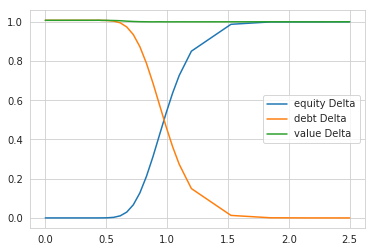

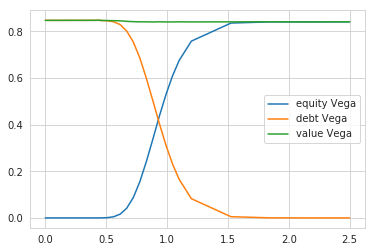

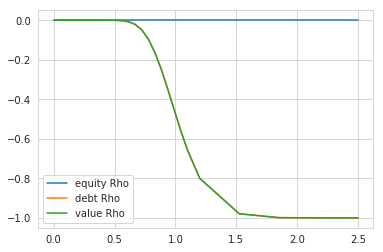

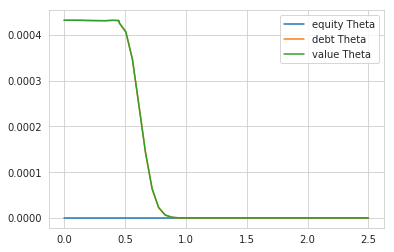

In [166]:
greeks = ['Delta', 'Vega', 'Rho', 'Theta']
T_val = df1.index.get_level_values('T').unique()[-1]
df_scale_val = df1.index.get_level_values('default scale').unique()[0]
con_val = df1.index.get_level_values('conn').unique()[0]
r_val = 0.#df1.index.get_level_values('r').unique()[0]
sp = df1.index.get_level_values('S0').unique()
col_sum_val = df1.index.get_level_values('col sum').unique()[10]
sigma_val = df1.index.get_level_values('sigma').unique()[0]
net_type = df1.index.get_level_values('Network Type').unique()[0]


test = df1.loc[idx[net_type, 100, con_val, col_sum_val, df_scale_val, r_val, :, T_val,sigma_val]]

for g in greeks:
    data = df1.loc[idx[net_type, 100, con_val, col_sum_val, df_scale_val, r_val, :, T_val,sigma_val],['equity '+g,'equity '+g+' var','debt '+g,\
                                                  'debt '+g+' var', 'Number Of Samples']]
    data.reset_index([0,1,2,3,4,5,6,7], inplace=True)

    x = data['S0']
    y = data['equity '+g]
    plt.plot(x,y, label="equity " + g)
    y = data['debt '+g]
    plt.plot(x,y, label="debt " + g)
    y = data['equity '+g]+ data['debt '+g]
    plt.plot(x,y, label="value " + g)
    plt.legend()
    plt.show()

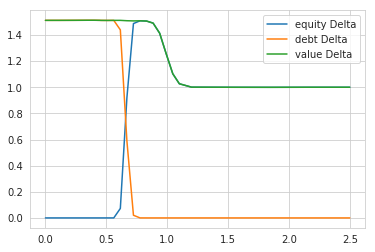

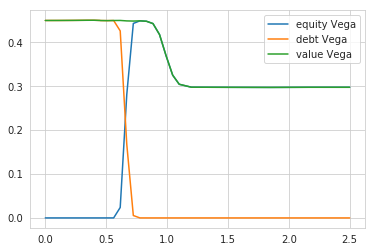

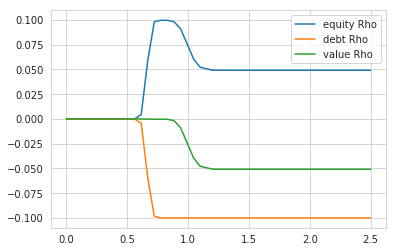

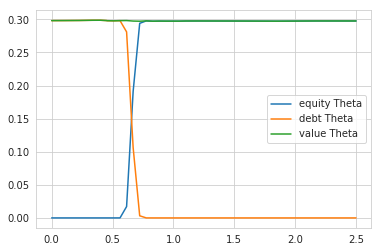

In [165]:
greeks = ['Delta', 'Vega', 'Rho', 'Theta']
T_val = df1.index.get_level_values('T').unique()[0]
df_scale_val = df1.index.get_level_values('default scale').unique()[0]
con_val = df1.index.get_level_values('conn').unique()[0]
r_val = 0.#df1.index.get_level_values('r').unique()[0]
sp = df1.index.get_level_values('S0').unique()
col_sum_val = df1.index.get_level_values('col sum').unique()[10]
sigma_val = df1.index.get_level_values('sigma').unique()[0]
net_type = df1.index.get_level_values('Network Type').unique()[0]


test = df1.loc[idx[net_type, 100, con_val, col_sum_val, df_scale_val, r_val, :, T_val,sigma_val]]

for g in greeks:
    data = df1.loc[idx[net_type, 100, con_val, col_sum_val, df_scale_val, r_val, :, T_val,sigma_val],['equity '+g+' 0','equity '+g+' var 0','debt '+g+' 0',\
                                                  'debt '+g+' var 0', 'Number Of Samples']]
    data.reset_index([0,1,2,3,4,5,6,7], inplace=True)

    x = data['S0']
    y = data['equity '+g+' 0']
    plt.plot(x,y, label="equity " + g)
    y = data['debt '+g+' 0']
    plt.plot(x,y, label="debt " + g)
    y = data['equity '+g+' 0']+ data['debt '+g+' 0']
    plt.plot(x,y, label="value " + g)
    plt.legend()
    plt.show()

In [159]:
test

,Solvent,Solvent var,Assets,Assets var,R,S,equity Delta,equity Delta var,debt Delta,debt Delta var,...,equity Theta 0,equity Theta var 0,debt Theta 0,debt Theta var 0,Assets 0,Assets 0 var,Solvent 0,Solvent 0 var,Pi 0,Pi 0 var
S0,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.017123,0.041164,0.0,0.0,...,0.000000e+00,0.000000e+00,8.477116e-02,1.557477e-03,0.000000,0.000000,0.00000,0.000000,6.950331e-03,9.298567e-31
0.112500,0.000000,0.000000,0.112494,0.000516,0.113276,0.000000e+00,1.017074,0.041212,0.0,0.0,...,0.000000e+00,0.000000e+00,8.487077e-02,1.571982e-03,0.112606,0.000521,0.00000,0.000000,6.950331e-03,9.298567e-31
0.225000,0.000000,0.000000,0.225043,0.002064,0.226607,0.000000e+00,1.017311,0.041188,0.0,0.0,...,0.000000e+00,0.000000e+00,8.455305e-02,1.536246e-03,0.224912,0.002045,0.00000,0.000000,6.950331e-03,9.298567e-31
0.337500,0.000000,0.000000,0.337449,0.004651,0.339795,0.000000e+00,1.016968,0.041249,0.0,0.0,...,0.000000e+00,0.000000e+00,8.464410e-02,1.569133e-03,0.337394,0.004689,0.00000,0.000000,6.950331e-03,9.298567e-31
0.400000,0.000003,0.000003,0.399958,0.006531,0.402738,6.291085e-08,1.017000,0.041247,0.0,0.0,...,5.991841e-34,7.180072e-63,8.434462e-02,1.523807e-03,0.399381,0.006465,0.00000,0.000000,6.950331e-03,9.298567e-31
0.450000,0.000021,0.000021,0.450036,0.008257,0.453163,8.647017e-07,1.017197,0.041288,0.0,0.0,...,2.776449e-05,1.541657e-05,8.453304e-02,1.520823e-03,0.449812,0.008206,0.00005,0.000050,6.949983e-03,2.415234e-09
0.453846,0.000030,0.000030,0.453896,0.008409,0.457049,1.348460e-06,1.017233,0.041376,0.0,0.0,...,5.018576e-15,5.036960e-25,8.464778e-02,1.531745e-03,0.453907,0.008320,0.00000,0.000000,6.950331e-03,1.244660e-26
0.507692,0.000287,0.000287,0.507871,0.010542,0.511385,1.619700e-05,1.017483,0.042530,0.0,0.0,...,1.837699e-04,7.574986e-05,8.490983e-02,1.555716e-03,0.508732,0.010667,0.00045,0.000450,6.947191e-03,2.172891e-08
0.561538,0.001520,0.001517,0.561463,0.012869,0.565276,8.889511e-05,1.016943,0.046970,0.0,0.0,...,4.632908e-04,1.493256e-04,8.427597e-02,1.467081e-03,0.561808,0.012838,0.00145,0.001448,6.940204e-03,6.994504e-08


ValueError: setting an array element with a sequence.

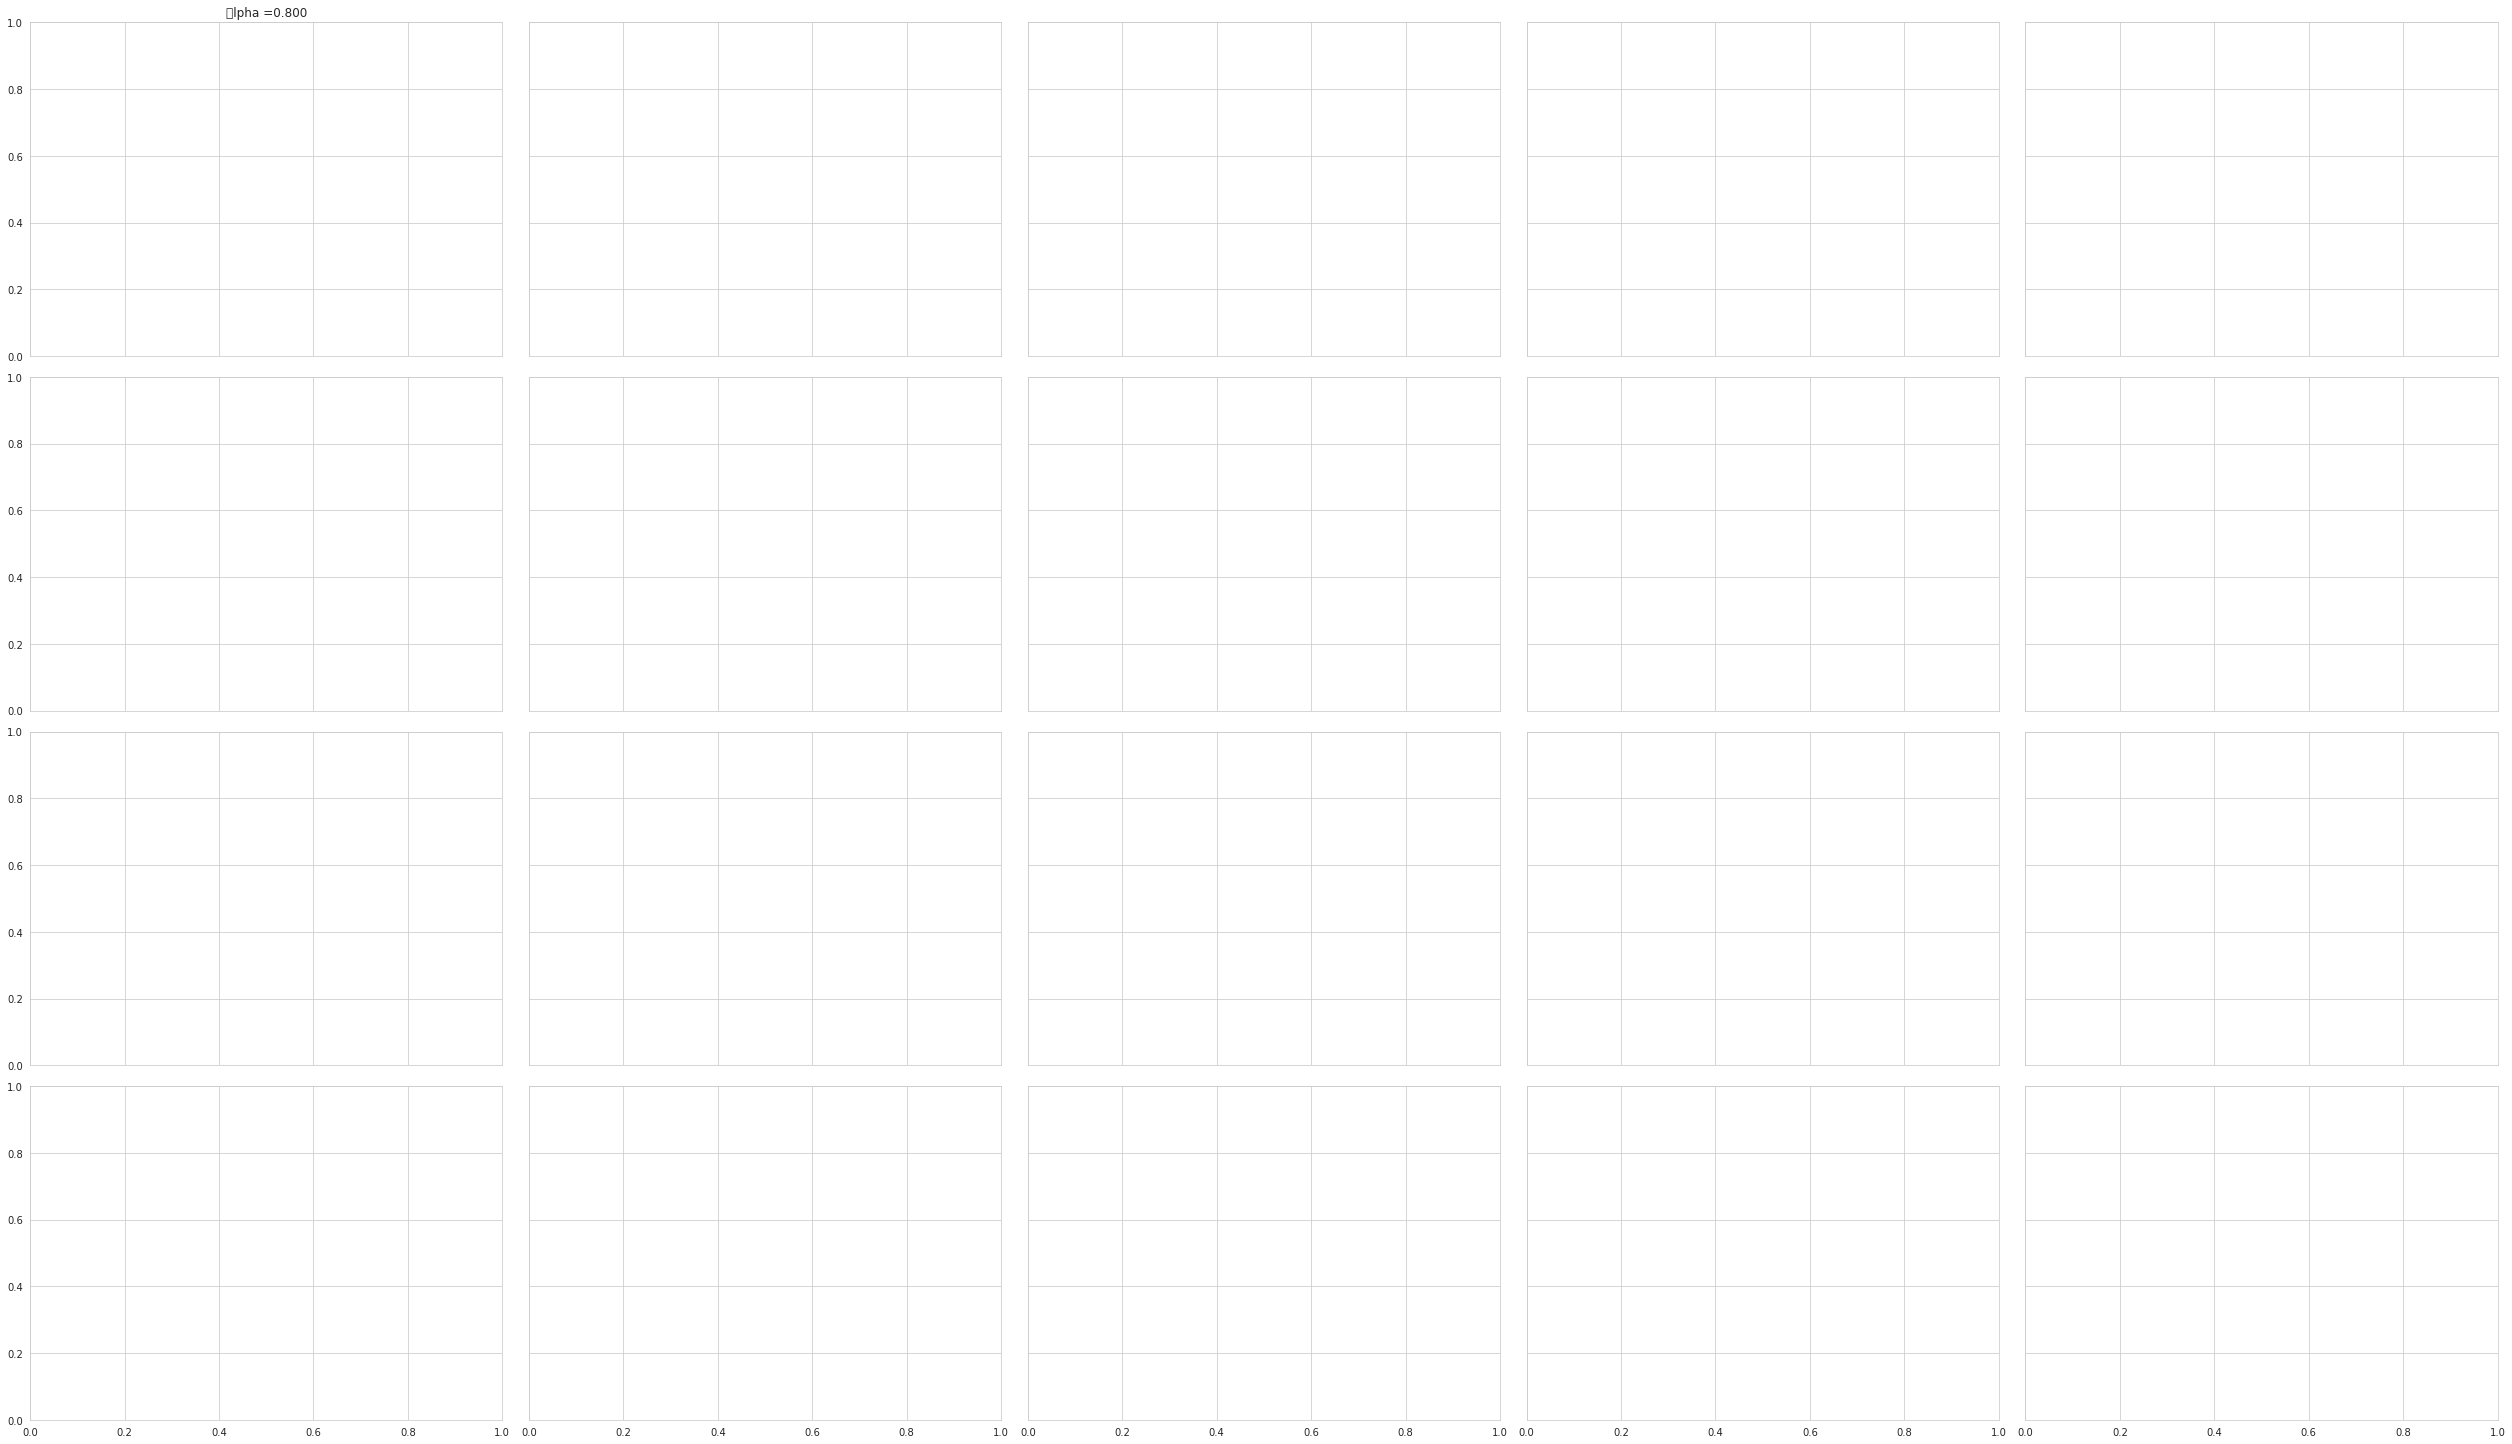

In [129]:
sns.set_style("whitegrid")
cmap = sns.color_palette("muted")#sns.cubehelix_palette(8, light=1)
#plt.rc('text', usetex=True)

#sns.set_palette(cmap)



def plot_val(l, ax, r, val, ds, S0, T , plot_index, greek, title="", ommit_title = False, ommit_xlabel = False, ommit_ylabel = False):
    nl = np.unique(l.reset_index()['N'])
    rl = np.unique(l.reset_index()['r'])
    cl = np.unique(l.reset_index()['conn'])
    fixed_index = list(np.setdiff1d(np.arange(len(l.index.get_values()[0])),[plot_index]))
    #c = begin(ccycle)
    ccycle = itertools.cycle(cmap)
    equity_color = (1,0,0,1)
    debt_color = (0,1,0,1)
    sum_color = (0,0,1,1)
    conn_list = cl[::3]
    for iconn, conn in enumerate(conn_list):
        for N in nl:
            #c = next(ccycle)
            #print("plotting: conn={0:.2f}, val={1:.2f}, df={2:.2f}, r={3:.2f},T={4:.2f}".format(conn,val,ds,r,T))
            data = l.loc[idx[N, conn, val, ds, r, :, T],['equity '+greek,'equity '+greek+' var','debt '+greek,\
                                                  'debt '+greek+' var', 'Number Of Samples']]
            #data = l.loc[idx[N,:,val, ds, r],['Vega','Vega var', 'Number Of Samples']]
            #data = l.loc[idx[N,:,val, ds, r],['Solvent', 'Number Of Samples']]
            #data = l.loc[idx[N,:,val, ds, r],['RS', 'Number Of Samples']]
            n_samples = np.sqrt(np.array([ el for el in data['Number Of Samples'].values]))
            x = l.loc[idx[N, conn, val, ds, r, :, T],:].reset_index([0,1,2,3,4,6]).index.values
            y = np.array([np.sum(el) for el in data['equity '+greek].values])
            y_err = ( data['equity '+greek+' var'].values)/np.sqrt(N)
            y_2 = np.array([np.sum(el) for el in data['debt '+greek].values])
            y_2_err = ( data['debt '+greek+' var'].values)/np.sqrt(N)
            y_3 = np.array([np.sum(el) for el in data['debt '+greek].values + data['equity '+greek].values])
            y_3_err = (data['equity '+greek+' var'].values + data['debt '+greek+' var'].values)/(2*np.sqrt(N))
            #y = np.array([np.sum(el[:N]+el[N:])/(float(N)) for el in data['RS'].values])
            #y = np.array([np.sum(el)/(float(N)) for el in data['Solvent'].values])
            #y = np.array([np.sum(el)/(float(N)) for el in data['Vega'].values])
            #y_err = np.array([np.sqrt(np.sum(el)/float(N)) for el in data['Vega var'].values])/n_samples
            ii = np.argsort(x)
            x = x[ii]
            y = y[ii]
            y_2 = y_2[ii]
            y_3 = y_3[ii]
            #y_err = y_err[ii]
            #sns.lineplot(x,y, ax = ax) marker='o', markersize=4.4
            if not ommit_title:
                if title:
                    ax.set_title(title)
                else:
                    ax.set_title(r"$\sum_j M_{ij} = ${0:.3f}".format(val) +" default scale ${0:.2f}".format(ds))
            ax.plot(x,y_3,marker='o', markersize=3.0, label="Value "+greek+". N="+str(N)+", r="+str(r), alpha=0.4, color=(1.-iconn/len(conn_list),0,0,1))#,color=c)
            #ax.fill_between(x, y_3-y_3_err, y_3+y_3_err, color=c, alpha=0.4)
            c = next(ccycle)
            ax.plot(x,y, marker='o', markersize=3.0, label="Equity "+greek+". N="+str(N)+", r="+str(r), alpha=0.3, color=(0,1.-iconn/len(conn_list),0,1))#,color=c)
            #ax.fill_between(x, y-y_err, y+y_err, color=c, alpha=0.4)
            c = next(ccycle)
            ax.plot(x,y_2, marker='o', markersize=3.0, label="Debt "+greek+". N="+str(N)+", r="+str(r), alpha=0.3, color=(0,0,1.-iconn/len(conn_list),1))#,color=c)
            #ax.fill_between(x, y_2-y_2_err, y_2+y_2_err, color=c, alpha=0.4)
            
            if not ommit_xlabel:
                ax.set_xlabel(df1.index.names[plot_index])
            #ax.legend()

    
plot_index = 5
T_val = df1.index.get_level_values('T').unique()[-1]
df_scale_val = df1.index.get_level_values('default scale').unique()[0]
con_val = df1.index.get_level_values('conn').unique()[0]
r_val = 0.#df1.index.get_level_values('r').unique()[0]
sp = df1.index.get_level_values('S0').unique()
col_sum_val = df1.index.get_level_values('col sum').unique()[4]
plot_rows = ['Delta', 'Vega', 'Rho', 'Theta']
plot_cols = df1.index.get_level_values('col sum').unique()[::5]


fig, axs = plt.subplots(nrows=len(plot_rows), ncols=len(plot_cols), sharex='col', sharey='row', figsize=(7*len(plot_cols), 5*len(plot_rows)))
# # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axs[0, :]], visible=False)
plt.setp([a.get_yticklabels() for i in range(1,len(plot_cols)) for a in axs[:, i]], visible=False)
#plt.setp([a.get_xlabel() for a in axs[0, :]], visible=False)
#plt.setp([a.get_ylabel() for i in range(1,len(plot_cols)) for a in axs[:, i]], visible=False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
#fig.subplots_adjust(top=0.88)

for ir, greek in enumerate(plot_rows):
    if len(plot_cols) > 1:
        for ic, val in enumerate(plot_cols):
            ax = axs[ir,ic]
            plot_val(df1 , ax, r_val, val, df_scale_val, sp, T_val, plot_index, greek, "\alpha ={0:.3f}".format(val), ommit_title=(ir!=0), ommit_xlabel=(ir!=len(plot_rows)-1))
    else:
        ax = axs[ic]
        plot_val(df1 ,ax, r_val, val, df_scale_val, sp, T_val, plot_index, greek, "\alpha ={0:.3f}".format(val),  ommit_title=(ir!=0), ommit_xlabel=(ir!=len(plot_rows)-1))
        #",  $\alpha$={0:.3f}".format(val)
#axs[0,0].set_ylabel(r'$\Sigma_{ij} \Delta_{ij}$')
#axs[1,0].set_ylabel(r'$\Sigma_{ij} \Delta_{ij}$')
#axs[2,0].set_ylabel(r'$\Sigma_{ij} \Delta_{ij}$')
#axs[2,0].set_xlabel(r'$\langle k \rangle = n \cdot p$')
#axs[2,1].set_xlabel(r'$\langle k \rangle = n \cdot p$')
#plt.errorbar(x, y, yerr=y_err, fmt='o')

plt.show()

In [ ]:
df1.columns

In [ ]:

plot_rows = ['Solvent', 'Assets', 'Pi']

In [ ]:
N = np.unique(df1.reset_index()['N'])
r = np.unique(df1.reset_index()['r'])
T = np.unique(df1.reset_index()['T'])
spot_prices = np.unique(df1.reset_index()['S0'])
conn = np.unique(df1.reset_index()['conn'])
ds = conn = np.unique(df1.reset_index()['default scale'])
data = df1.loc[idx[N, conn, val, ds, r, spot_prices, T], ['R','S']]

plt.plot(spot_prices, data['R'],spot_prices, data['S'],spot_prices, data['R']+data['S'])
plt.show()